# Simple Linear Regression

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Loading Dataset

In [26]:
df = pd.read_csv('J:\Courses\Top Mentor\Class Notes\Day 18 (July 2)\data.csv')
df.head() #To get top 5 rows from table

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [27]:
# Checking for null values
df.isnull().sum()

Height    0
Weight    0
dtype: int64

## Developing a model

In [28]:
# y = mx + c
df.info()               # To check rows and col. in Table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [68]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split

# Give independent data to x & dependent data to y
x = df.iloc[: , 0]      # independent 
y = df['Weight']    # dependent

In [69]:
x.shape, y.shape

((15,), (15,))

In [70]:
x = x.values.reshape(-1, 1)

In [71]:
x.shape

(15, 1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = None)     
# test_size indicates percentage of values for test i.e, 20% Data = Test & 80% Data = Train 

In [73]:
x_train, y_train          # 80% Random Data selected for train

(array([[1.68],
        [1.78],
        [1.83],
        [1.5 ],
        [1.47],
        [1.6 ],
        [1.63],
        [1.73],
        [1.7 ],
        [1.75],
        [1.8 ],
        [1.65]]),
 8     63.11
 12    69.92
 14    74.46
 1     53.12
 0     52.21
 5     58.57
 6     59.93
 10    66.28
 9     64.47
 11    68.10
 13    72.19
 7     61.29
 Name: Weight, dtype: float64)

In [74]:
x_test, y_test            # 20% Random Data selected for test

(array([[1.55],
        [1.57],
        [1.52]]),
 3    55.84
 4    57.20
 2    54.48
 Name: Weight, dtype: float64)

In [75]:
training_data = pd.DataFrame ({'x_train' : x_train.flatten(), 'y_train' : y_train})        # Putting training data into 1 table

In [76]:
test_data = pd.DataFrame ({'x_test' : x_test.flatten(), 'y_test' : y_test})                # Putting test data into 1 table

In [77]:
training_data, test_data

(    x_train  y_train
 8      1.68    63.11
 12     1.78    69.92
 14     1.83    74.46
 1      1.50    53.12
 0      1.47    52.21
 5      1.60    58.57
 6      1.63    59.93
 10     1.73    66.28
 9      1.70    64.47
 11     1.75    68.10
 13     1.80    72.19
 7      1.65    61.29,
    x_test  y_test
 3    1.55   55.84
 4    1.57   57.20
 2    1.52   54.48)

In [78]:
len(x_train), len(x_test)

(12, 3)

In [79]:
len(y_train), len(y_test)

(12, 3)

In [87]:
# Now, giving training data to train the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)            #fit is mediator, gives train data to reg (algorithm: y=mx+c)

LinearRegression()

In [90]:
# m-value
reg.coef_

array([61.71225745])

In [91]:
#c-value
reg.intercept_

-39.83338499763364

In [ ]:
# Algorithm: y = mx + c
# Model:   y = (61.71225745 * x) + (-39.83338499763364)    
# model is trained  (From Algorithm we got the model)

## Graphical Representation of train data

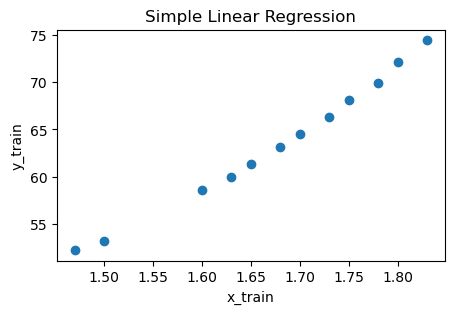

In [89]:
# Now, we will see how training data looks like in graphical representation
plt.figure(figsize=(5,3))
plt.scatter(x=x_train, y=y_train)
plt.title('Simple Linear Regression')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

In [ ]:
# Since, x points and y points are increasing we can say it is positive covarianvce

In [ ]:
## Making train predictions
y_train_predictions = reg.predict(x_train)
print(y_train_predictions)

In [93]:
training_data ['y_train_predictions'] = y_train_predictions    # adding y_train_predictions col. alongside x_train & y_train 
print(training_data)

    x_train  y_train  y_train_predictions
8      1.68    63.11            63.843208
12     1.78    69.92            70.014433
14     1.83    74.46            73.100046
1      1.50    53.12            52.735001
0      1.47    52.21            50.883633
5      1.60    58.57            58.906227
6      1.63    59.93            60.757595
10     1.73    66.28            66.928820
9      1.70    64.47            65.077453
11     1.75    68.10            68.163066
13     1.80    72.19            71.248678
7      1.65    61.29            61.991840


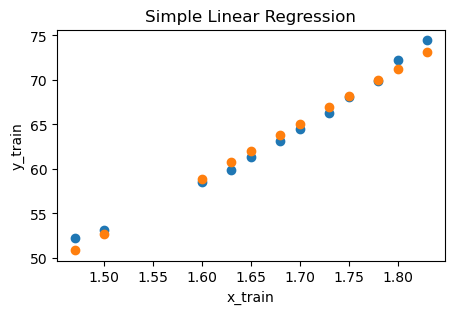

In [94]:
# Graphical representation of actual data & predicted data
plt.figure(figsize=(5,3))
plt.scatter(x=x_train, y=y_train)
plt.scatter(x=x_train, y=y_train_predictions)
plt.title('Simple Linear Regression')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

### Finding Accuracy and Loss of the Train Data

In [107]:
# find accuracy of train_data
from sklearn.metrics import r2_score         #r2_score = used to find accuracy of the model
print(f'Train Accuracy: {r2_score(y_train, y_train_predictions)}')

Train Accuracy: 0.9866225015352759


In [99]:
# find loss of train_data
# Formula: loss = 1 - accuracy
print(f'Train Loss: {1 - r2_score(y_train, y_train_predictions)}')

Train Loss: 0.013377498464724136


In [100]:
0.9866225015352759 + 0.013377498464724136

1.0

## Work with test data

In [101]:
y_test_predictions = reg.predict(x_test)
print(y_test_predictions)

[55.82061406 57.0548592  53.96924633]


In [102]:
test_data['y_test_predictions'] = y_test_predictions      # adding y_test_predictions col. alongside x_test & y_test
print(test_data)

   x_test  y_test  y_test_predictions
3    1.55   55.84           55.820614
4    1.57   57.20           57.054859
2    1.52   54.48           53.969246


### Finding Accuracy and Loss of the Test Data

In [106]:
# find accuracy of test_data
print(f'Test Accuracy: {r2_score(y_test, y_test_predictions)}')

Test Accuracy: 0.9236832357352609


In [104]:
# find loss of test_data
print(f'Test Loss: {1 - r2_score(y_test, y_test_predictions)}')

Test Loss: 0.0763167642647391


In [105]:
0.9236832357352609 + 0.0763167642647391

1.0

In [108]:
# Testing model with own data
# Find how much weight will be there for 2 ft height
reg.predict([[2.0]])

array([83.59112991])

In [112]:
# Check Manually using obtained model
# y = (61.71225745 * x) + (-39.83338499763364)
y = (61.71225745 * 2) + (-39.83338499763364)
print(y)

83.59112990236636
